###  Data set para predecir si un paciente tendrá nódulos tiroideos benignos o malignos.

## Recoleccion de datos
> **Link: https://www.kaggle.com/datasets/bhargavchirumamilla/thyroid-cancer-risk-dataset** 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/thyroid-cancer-risk-dataset/thyroid_cancer_risk_data.csv


In [3]:
data = pd.read_csv('/kaggle/input/thyroid-cancer-risk-dataset/thyroid_cancer_risk_data.csv')

In [4]:
data.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


## Exploración de datos

In [5]:
data.shape

(212691, 17)

In [6]:
data.columns

Index(['Patient_ID', 'Age', 'Gender', 'Country', 'Ethnicity', 'Family_History',
       'Radiation_Exposure', 'Iodine_Deficiency', 'Smoking', 'Obesity',
       'Diabetes', 'TSH_Level', 'T3_Level', 'T4_Level', 'Nodule_Size',
       'Thyroid_Cancer_Risk', 'Diagnosis'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

In [8]:
data.describe()

,Patient_ID,Age,TSH_Level,T3_Level,T4_Level,Nodule_Size
count,212691.00000,212691.000000,212691.000000,212691.000000,212691.000000,212691.000000
mean,106346.00000,51.918497,5.045102,2.001727,8.246204,2.503403
std,61398.74739,21.632815,2.860264,0.866248,2.164188,1.444631
min,1.00000,15.000000,0.100000,0.500000,4.500000,0.000000
25%,53173.50000,33.000000,2.570000,1.250000,6.370000,1.250000
50%,106346.00000,52.000000,5.040000,2.000000,8.240000,2.510000
75%,159518.50000,71.000000,7.520000,2.750000,10.120000,3.760000
max,212691.00000,89.000000,10.000000,3.500000,12.000000,5.000000


In [9]:
data.describe(include='all')

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
count,212691.00000,212691.000000,212691,212691,212691,212691,212691,212691,212691,212691,212691,212691.000000,212691.000000,212691.000000,212691.000000,212691,212691
unique,NaN,NaN,2,10,5,2,2,2,2,2,2,NaN,NaN,NaN,NaN,3,2
top,NaN,NaN,Female,India,Caucasian,No,No,No,No,No,No,NaN,NaN,NaN,NaN,Low,Benign
freq,NaN,NaN,127527,42496,63669,148866,180831,159673,170260,148805,170098,NaN,NaN,NaN,NaN,108388,163196
mean,106346.00000,51.918497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.045102,2.001727,8.246204,2.503403,NaN,NaN
std,61398.74739,21.632815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.860264,0.866248,2.164188,1.444631,NaN,NaN
min,1.00000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.100000,0.500000,4.500000,0.000000,NaN,NaN
25%,53173.50000,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.570000,1.250000,6.370000,1.250000,NaN,NaN
50%,106346.00000,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.040000,2.000000,8.240000,2.510000,NaN,NaN
75%,159518.50000,71.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.520000,2.750000,10.120000,3.760000,NaN,NaN


In [10]:
data.isnull().sum()

Patient_ID             0
Age                    0
Gender                 0
Country                0
Ethnicity              0
Family_History         0
Radiation_Exposure     0
Iodine_Deficiency      0
Smoking                0
Obesity                0
Diabetes               0
TSH_Level              0
T3_Level               0
T4_Level               0
Nodule_Size            0
Thyroid_Cancer_Risk    0
Diagnosis              0
dtype: int64

In [11]:
data.duplicated().sum()

0

### Descripción de dataset:
* **Tiene 17 columnas y 212691 observaciones**
* **6 columnas son numéricas y 11 son categóricas**
* **No tiene valores nulos ni filas duplicadas**
* **Se eliminará la primera columna 'Patient_ID' ya que no aporta información** 

In [ ]:
data.drop(['Patient_ID'],axis=1,inplace=True)

## Análisis de variables 

In [12]:
data['Diagnosis'].value_counts()

Diagnosis
Benign       163196
Malignant     49495
Name: count, dtype: int64

In [13]:
var_cat = [col for col in data.columns if data[col].dtypes in ['object']]
var_num = [col for col in data.columns if data[col].dtypes not in ['object']]

### Análisis de variables categóricas  

                                                  Gender


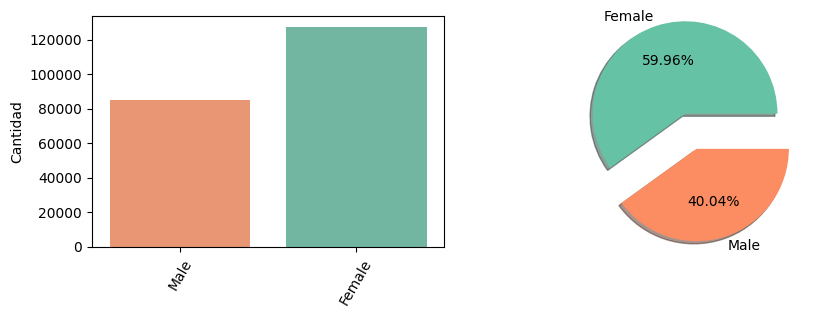

,count
Gender,
Female,127527
Male,85164


----------------------------------------------------------------------------------------------------

                                                  Country


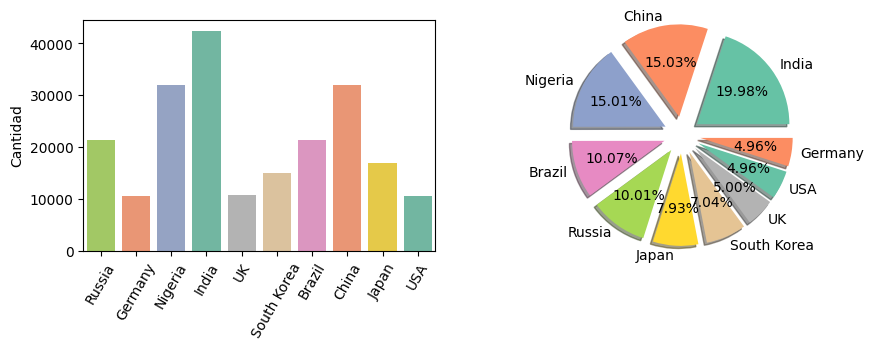

,count
Country,
India,42496
China,31978
Nigeria,31918
Brazil,21413
Russia,21297
Japan,16867
South Korea,14965
UK,10642
USA,10558


----------------------------------------------------------------------------------------------------

                                                  Ethnicity


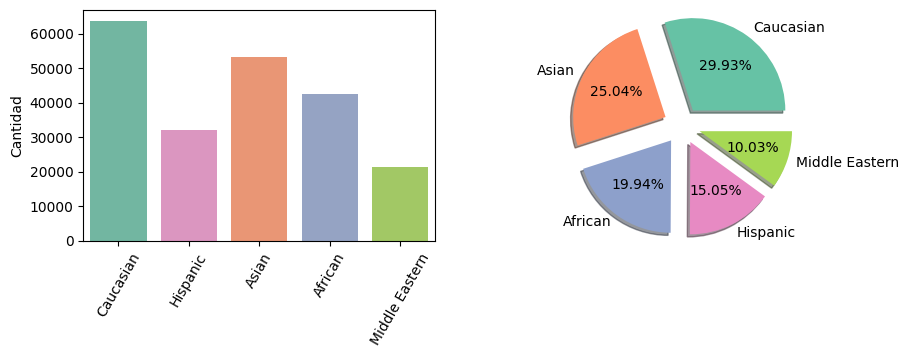

,count
Ethnicity,
Caucasian,63669
Asian,53261
African,42414
Hispanic,32012
Middle Eastern,21335


----------------------------------------------------------------------------------------------------

                                                  Family_History


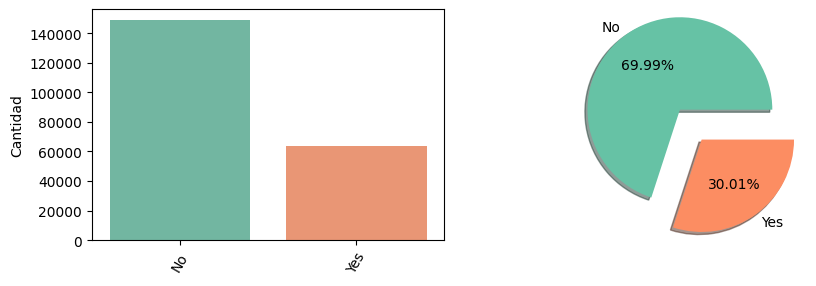

,count
Family_History,
No,148866
Yes,63825


----------------------------------------------------------------------------------------------------

                                                  Radiation_Exposure


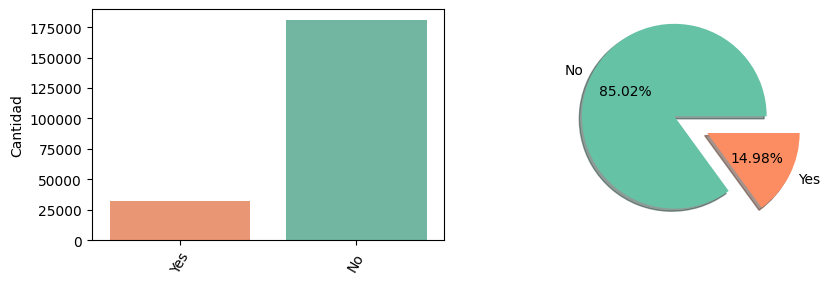

,count
Radiation_Exposure,
No,180831
Yes,31860


----------------------------------------------------------------------------------------------------

                                                  Iodine_Deficiency


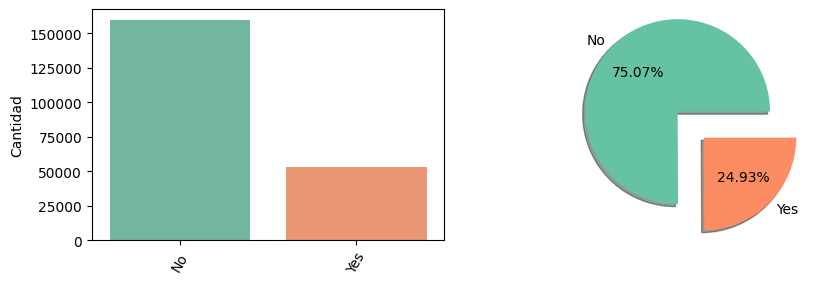

,count
Iodine_Deficiency,
No,159673
Yes,53018


----------------------------------------------------------------------------------------------------

                                                  Smoking


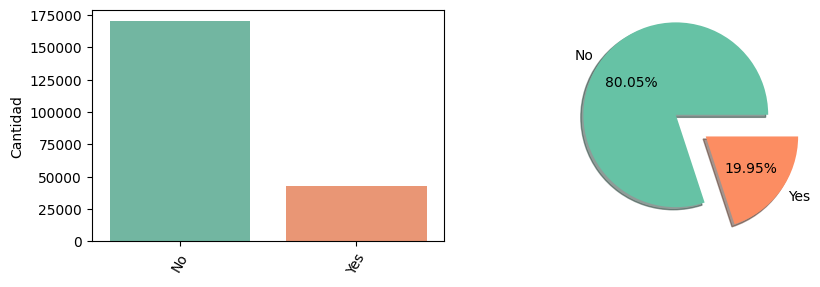

,count
Smoking,
No,170260
Yes,42431


----------------------------------------------------------------------------------------------------

                                                  Obesity


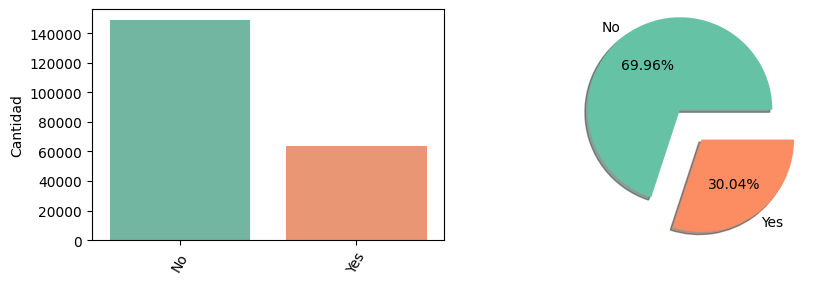

,count
Obesity,
No,148805
Yes,63886


----------------------------------------------------------------------------------------------------

                                                  Diabetes


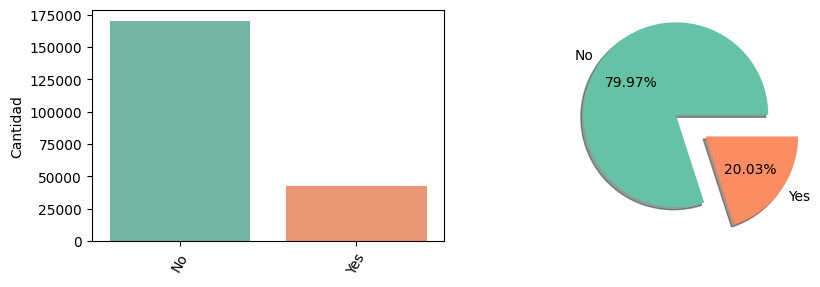

,count
Diabetes,
No,170098
Yes,42593


----------------------------------------------------------------------------------------------------

                                                  Thyroid_Cancer_Risk


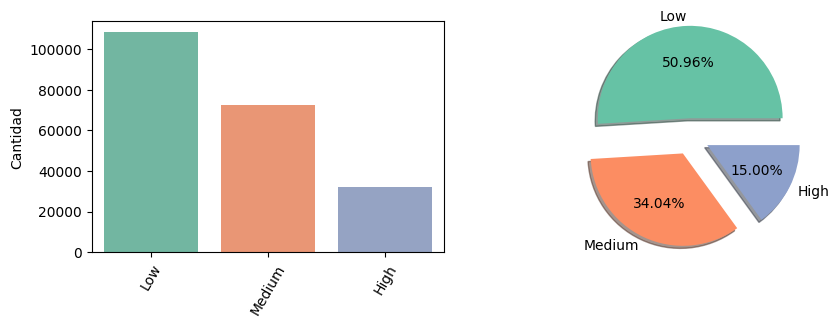

,count
Thyroid_Cancer_Risk,
Low,108388
Medium,72400
High,31903


----------------------------------------------------------------------------------------------------

                                                  Diagnosis


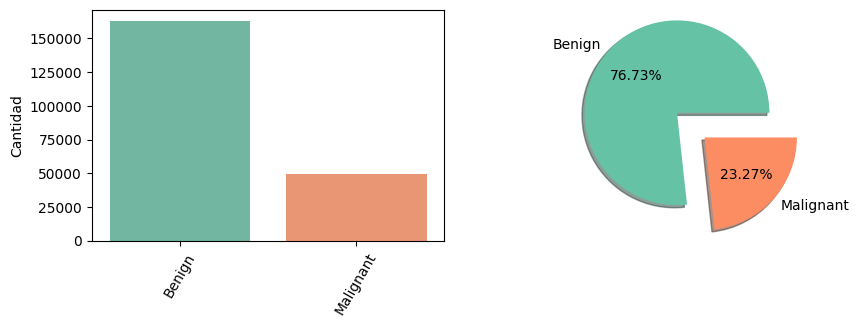

,count
Diagnosis,
Benign,163196
Malignant,49495


----------------------------------------------------------------------------------------------------



In [14]:
for col in var_cat:
    unique_vals = data[col].value_counts().index
    palette = sns.color_palette("Set2", len(unique_vals))
    color_dict = dict(zip(unique_vals, palette))

    plt.figure(figsize=(10,3))

    print(' '*50+col)

    plt.subplot(1,2,1)
    sns.countplot(x=data[col],palette=color_dict)
    plt.xticks(rotation=60)
    plt.ylabel('Cantidad')
    plt.xlabel('')

    plt.subplot(1,2,2)
    data[col].value_counts().plot(kind='pie', autopct='%0.2f%%', labels=unique_vals,
                 shadow=True, explode=[0.2]*len(unique_vals),colors=[color_dict[val] for val in unique_vals])
    plt.ylabel('')

    plt.show()

    display(pd.DataFrame(data[col].value_counts()))

    print('-'*100+'\n')

In [16]:
data_cp = data.copy()

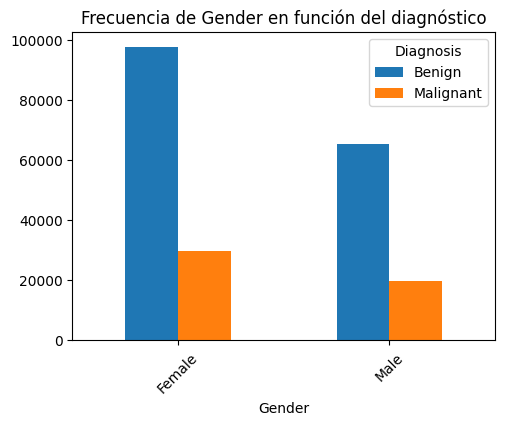

0
Diagnosis Gender       
Benign    Female  97787
          Male    65409
Malignant Female  29740
          Male    19755

----------------------------------------------------------------------------------------------------


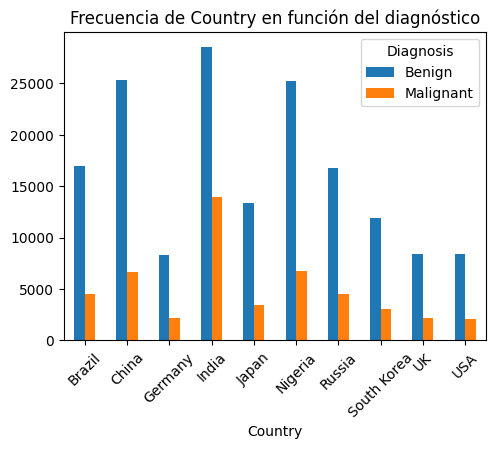

0
Diagnosis Country           
Benign    Brazil       16934
          China        25280
          Germany       8340
          India        28520
          Japan        13388
          Nigeria      25206
          Russia       16790
          South Korea  11882
          UK            8417
          USA           8439
Malignant Brazil        4479
          China         6698
          Germany       2217
          India        13976
          Japan         3479
          Nigeria       6712
          Russia        4507
          South Korea   3083
          UK            2225
          USA           2119

----------------------------------------------------------------------------------------------------


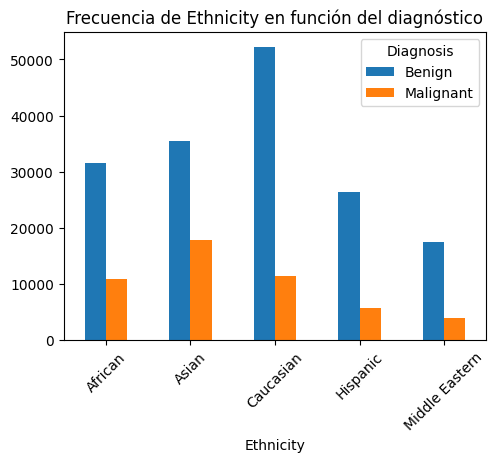

0
Diagnosis Ethnicity            
Benign    African         31610
          Asian           35441
          Caucasian       52303
          Hispanic        26333
          Middle Eastern  17509
Malignant African         10804
          Asian           17820
          Caucasian       11366
          Hispanic         5679
          Middle Eastern   3826

----------------------------------------------------------------------------------------------------


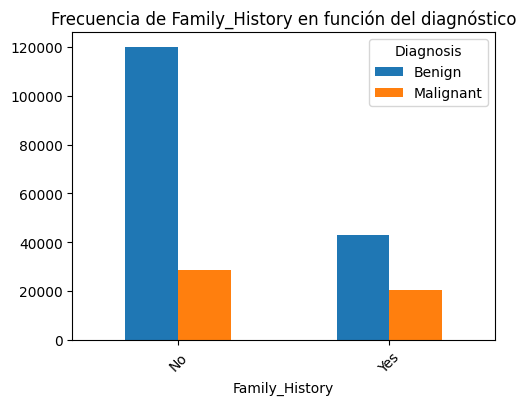

0
Diagnosis Family_History        
Benign    No              120028
          Yes              43168
Malignant No               28838
          Yes              20657

----------------------------------------------------------------------------------------------------


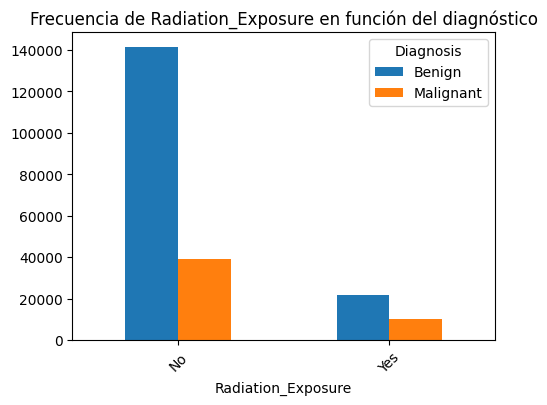

0
Diagnosis Radiation_Exposure        
Benign    No                  141606
          Yes                  21590
Malignant No                   39225
          Yes                  10270

----------------------------------------------------------------------------------------------------


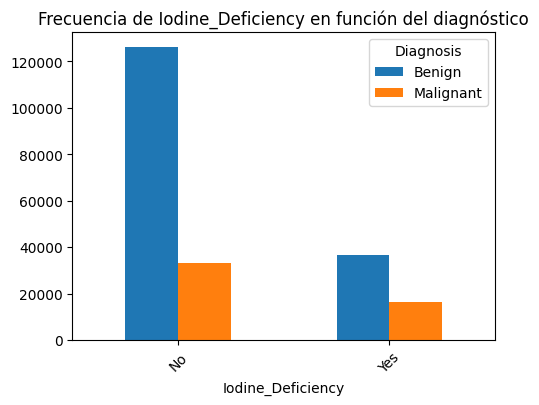

0
Diagnosis Iodine_Deficiency        
Benign    No                 126366
          Yes                 36830
Malignant No                  33307
          Yes                 16188

----------------------------------------------------------------------------------------------------


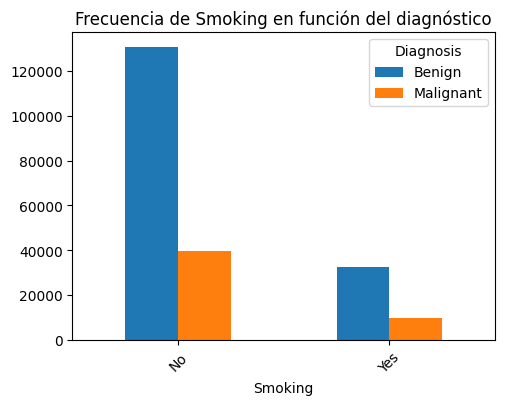

0
Diagnosis Smoking        
Benign    No       130670
          Yes       32526
Malignant No        39590
          Yes        9905

----------------------------------------------------------------------------------------------------


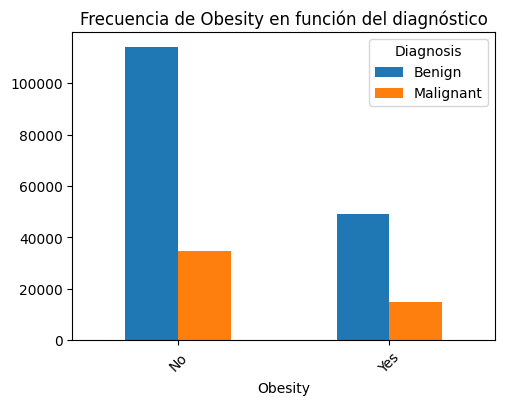

0
Diagnosis Obesity        
Benign    No       114126
          Yes       49070
Malignant No        34679
          Yes       14816

----------------------------------------------------------------------------------------------------


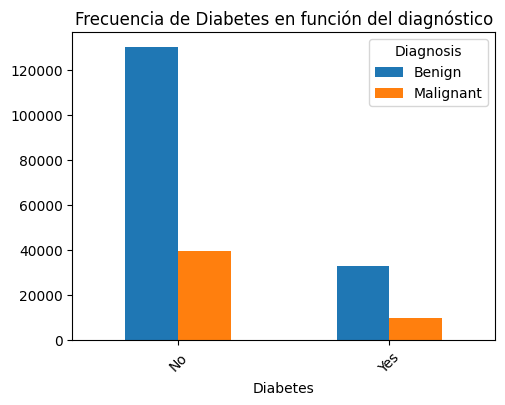

0
Diagnosis Diabetes        
Benign    No        130399
          Yes        32797
Malignant No         39699
          Yes         9796

----------------------------------------------------------------------------------------------------


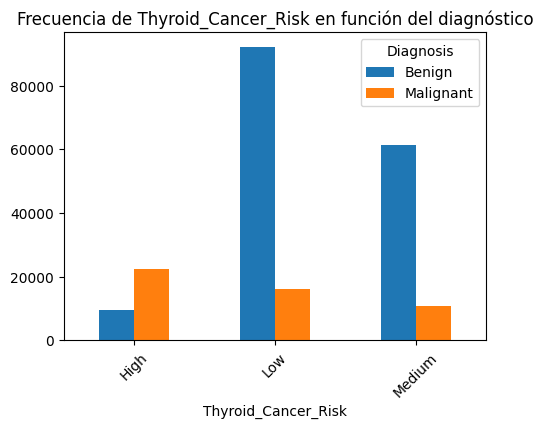

0
Diagnosis Thyroid_Cancer_Risk       
Benign    High                  9564
          Low                  92153
          Medium               61479
Malignant High                 22339
          Low                  16235
          Medium               10921

----------------------------------------------------------------------------------------------------


In [17]:
for col in var_cat[:-1]:
    plt.figure(figsize=(12, 4))

    crosstab = pd.crosstab(data_cp[col], data_cp['Diagnosis'])

    ax1 = plt.subplot(1, 2, 1)  
    crosstab.plot(kind='bar', ax=ax1)
    ax1.set_title(f'Frecuencia de {col} en función del diagnóstico')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
 
    plt.show()

    display(pd.DataFrame(data_cp.groupby(['Diagnosis',col]).size()))

    print('-'*100)

### Análisis de variables numéricas

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


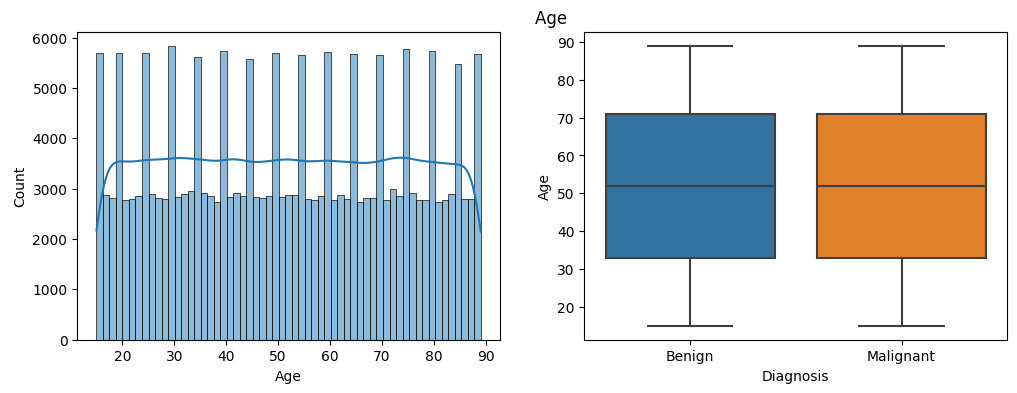

,Age
count,212691.000000
mean,51.918497
std,21.632815
min,15.000000
25%,33.000000
50%,52.000000
75%,71.000000
max,89.000000


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


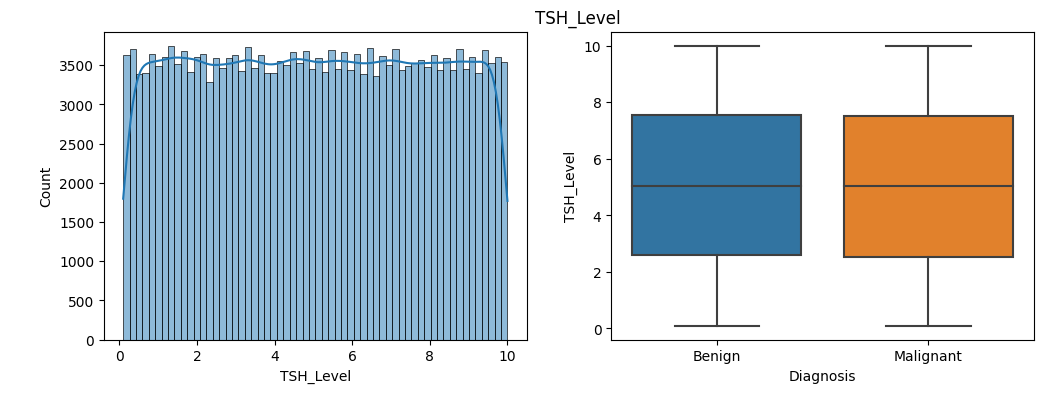

,TSH_Level
count,212691.000000
mean,5.045102
std,2.860264
min,0.100000
25%,2.570000
50%,5.040000
75%,7.520000
max,10.000000


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


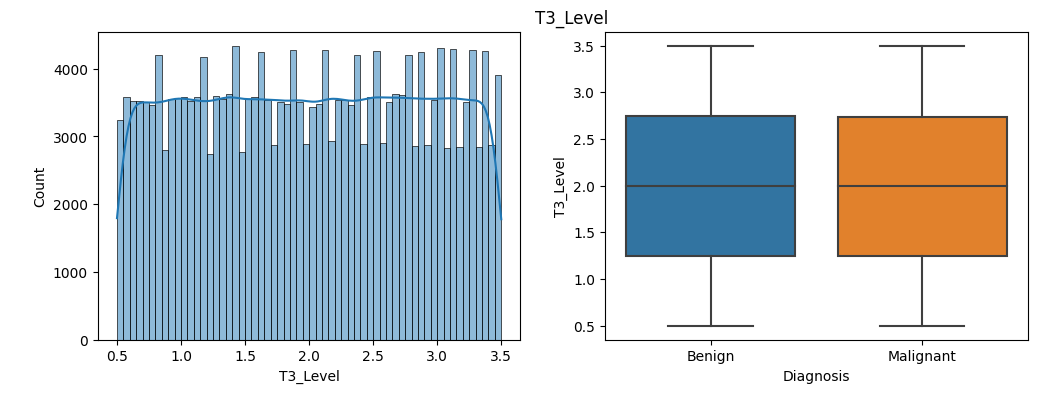

,T3_Level
count,212691.000000
mean,2.001727
std,0.866248
min,0.500000
25%,1.250000
50%,2.000000
75%,2.750000
max,3.500000


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


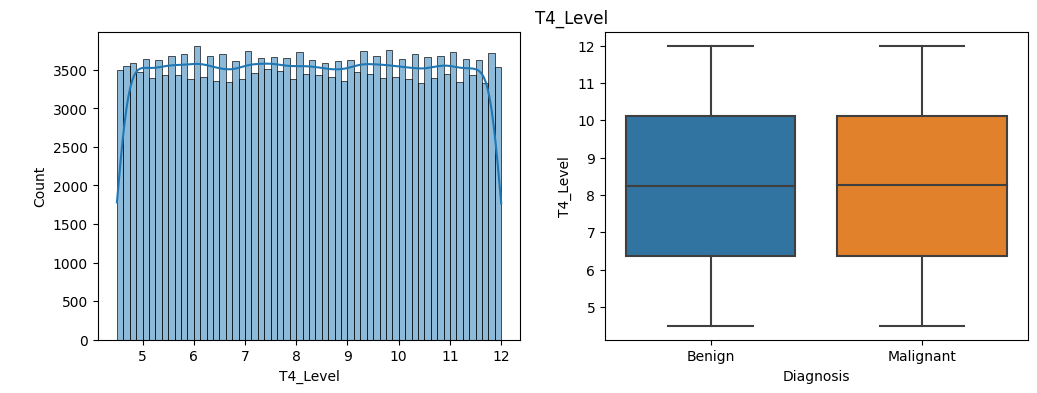

,T4_Level
count,212691.000000
mean,8.246204
std,2.164188
min,4.500000
25%,6.370000
50%,8.240000
75%,10.120000
max,12.000000


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


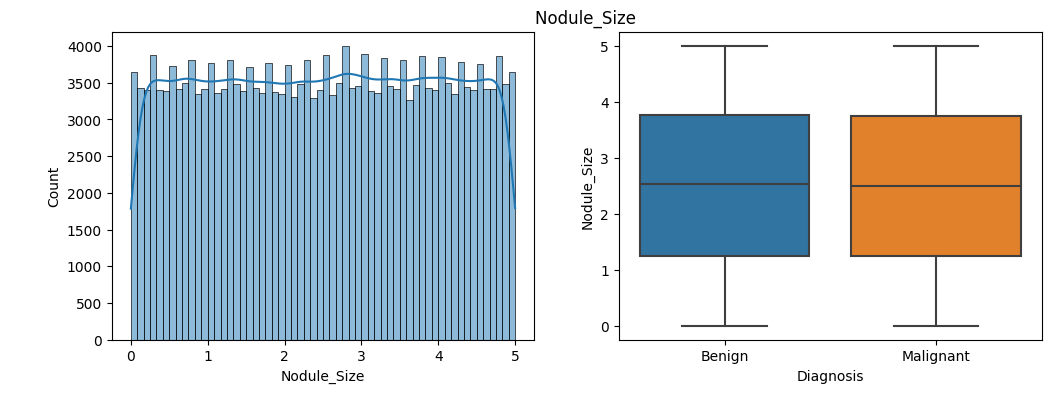

,Nodule_Size
count,212691.000000
mean,2.503403
std,1.444631
min,0.000000
25%,1.250000
50%,2.510000
75%,3.760000
max,5.000000


In [18]:
for col in var_num[1:]:
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    plt.title(' '*100+col)
    sns.histplot(x=data[col], kde=True)

    plt.subplot(1,2,2)
    sns.boxplot(x=data['Diagnosis'],y=data[col])

    plt.show()

    print()

    display(pd.DataFrame(data[col].describe()))
    print()

## Preprocesado de datos.
> ****Convertir la variable objetivo, que es una variable categórica, en una variable binaria.****

In [19]:
data_cp = data.copy()

In [20]:
data_cp['Diagnosis'].unique()

array(['Benign', 'Malignant'], dtype=object)

In [21]:
data_cp["Diagnosis"] = data_cp["Diagnosis"].replace({'Benign':1,'Malignant':0})

<ipython-input-21-ba3d8f65fc48>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_cp["Diagnosis"] = data_cp["Diagnosis"].replace({'Benign':1,'Malignant':0})


In [22]:
data_cp['Diagnosis'].unique()

array([1, 0])

# Construcción del modelo.
### Regresión logística.

###  Modelo con todas las variables.
> División de datos en datos de entrenamiento y en datos de prueba

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder   

In [24]:
data_lr = data_cp.copy()

In [25]:
encoder = LabelEncoder()

for var in data.columns.drop("Diagnosis"):
    data_lr[var] = encoder.fit_transform(data_lr[var])

In [26]:
data_lr.head()

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,51,1,6,2,0,1,0,0,0,0,927,117,166,108,1,1
1,14,1,2,3,0,1,0,0,0,0,173,123,604,405,1,1
2,71,1,5,2,0,0,0,0,0,0,616,209,607,461,1,1
3,60,0,3,1,0,0,0,0,0,0,400,212,654,246,2,1
4,20,0,2,0,1,1,0,0,0,0,900,161,621,211,0,1


In [27]:
X = data_lr.drop(["Diagnosis"], axis=1)
Y = data_lr["Diagnosis"]

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

In [29]:
lr = LogisticRegression(solver="liblinear")
lr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

**Evaluación del modelo**

In [30]:
lr.score(x_test, y_test)

0.823454739217653

**Validación cruzada.**

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
scores = cross_val_score(LogisticRegression(),
                         X,Y,
                         scoring="accuracy",
                         cv=10)
print(scores)
print("\n","Score de la validación cruzada: ",scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

[0.82317819 0.82081903 0.82364004 0.82274672 0.82152428 0.82514458
 0.82570878 0.82199445 0.82617895 0.82091307]

 Score de la validación cruzada:  0.8231848080389993


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Modelos con selección de variables.
> Selección de rasgos y validación cruzada.

In [33]:
from sklearn.feature_selection import RFE

In [34]:
lr = LogisticRegression(solver="liblinear")

In [35]:
for i in reversed(range(1,12)):
    rfe = RFE(lr, n_features_to_select=i)
    rfe = rfe.fit(X,Y)
    
    var_select = pd.DataFrame(list(zip(X, rfe.support_, rfe.ranking_)), columns=["variable", "support", "ranking"])
    
    print("Modelo de regresión logística con ", i, " variables")
    display(var_select)
    
    X_new = data_lr[var_select[var_select["ranking"]==1]["variable"].unique()]
    x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.3, random_state=0)
    
    lr = LogisticRegression(solver="liblinear")
    lr.fit(x_train, y_train)
    score = lr.score(x_test, y_test)
    print("Score del modelo con ", i," variables",":",score)
    scores = cross_val_score(LogisticRegression(),
                         X_new,Y,
                         scoring="accuracy",
                         cv=10)
    
    print("Score de la validación cruzada: ",scores.mean())
    
    print("\n","-"*40,"\n")

Modelo de regresión logística con  11  variables


,variable,support,ranking
0,Age,False,4
1,Gender,True,1
2,Country,True,1
3,Ethnicity,True,1
4,Family_History,True,1
5,Radiation_Exposure,True,1
6,Iodine_Deficiency,True,1
7,Smoking,True,1
8,Obesity,True,1
9,Diabetes,True,1


Score del modelo con  11  variables : 0.8234704112337011
Score de la validación cruzada:  0.8235374339264412

 ---------------------------------------- 

Modelo de regresión logística con  10  variables


,variable,support,ranking
0,Age,False,5
1,Gender,True,1
2,Country,True,1
3,Ethnicity,True,1
4,Family_History,True,1
5,Radiation_Exposure,True,1
6,Iodine_Deficiency,True,1
7,Smoking,True,1
8,Obesity,True,1
9,Diabetes,True,1


Score del modelo con  10  variables : 0.8237525075225677
Score de la validación cruzada:  0.8235938520790052

 ---------------------------------------- 

Modelo de regresión logística con  9  variables


,variable,support,ranking
0,Age,False,6
1,Gender,False,2
2,Country,True,1
3,Ethnicity,True,1
4,Family_History,True,1
5,Radiation_Exposure,True,1
6,Iodine_Deficiency,True,1
7,Smoking,True,1
8,Obesity,True,1
9,Diabetes,True,1


Score del modelo con  9  variables : 0.8238622116349047
Score de la validación cruzada:  0.8235938520790052

 ---------------------------------------- 

Modelo de regresión logística con  8  variables


,variable,support,ranking
0,Age,False,7
1,Gender,False,3
2,Country,True,1
3,Ethnicity,True,1
4,Family_History,True,1
5,Radiation_Exposure,True,1
6,Iodine_Deficiency,True,1
7,Smoking,True,1
8,Obesity,False,2
9,Diabetes,True,1


Score del modelo con  8  variables : 0.8237211634904714
Score de la validación cruzada:  0.8235938520790052

 ---------------------------------------- 

Modelo de regresión logística con  7  variables


,variable,support,ranking
0,Age,False,8
1,Gender,False,4
2,Country,True,1
3,Ethnicity,True,1
4,Family_History,True,1
5,Radiation_Exposure,True,1
6,Iodine_Deficiency,True,1
7,Smoking,False,2
8,Obesity,False,3
9,Diabetes,True,1


Score del modelo con  7  variables : 0.8237211634904714
Score de la validación cruzada:  0.8236032554360037

 ---------------------------------------- 

Modelo de regresión logística con  6  variables


,variable,support,ranking
0,Age,False,9
1,Gender,False,5
2,Country,False,2
3,Ethnicity,True,1
4,Family_History,True,1
5,Radiation_Exposure,True,1
6,Iodine_Deficiency,True,1
7,Smoking,False,3
8,Obesity,False,4
9,Diabetes,True,1


Score del modelo con  6  variables : 0.8237211634904714
Score de la validación cruzada:  0.8235656420080097

 ---------------------------------------- 

Modelo de regresión logística con  5  variables


,variable,support,ranking
0,Age,False,10
1,Gender,False,6
2,Country,False,3
3,Ethnicity,True,1
4,Family_History,True,1
5,Radiation_Exposure,True,1
6,Iodine_Deficiency,True,1
7,Smoking,False,4
8,Obesity,False,5
9,Diabetes,False,2


Score del modelo con  5  variables : 0.8245361083249749
Score de la validación cruzada:  0.8237255198554403

 ---------------------------------------- 

Modelo de regresión logística con  4  variables


,variable,support,ranking
0,Age,False,11
1,Gender,False,7
2,Country,False,4
3,Ethnicity,False,2
4,Family_History,True,1
5,Radiation_Exposure,True,1
6,Iodine_Deficiency,True,1
7,Smoking,False,5
8,Obesity,False,6
9,Diabetes,False,3


Score del modelo con  4  variables : 0.8273570712136409
Score de la validación cruzada:  0.8273551794050654

 ---------------------------------------- 

Modelo de regresión logística con  3  variables


,variable,support,ranking
0,Age,False,12
1,Gender,False,8
2,Country,False,5
3,Ethnicity,False,3
4,Family_History,True,1
5,Radiation_Exposure,True,1
6,Iodine_Deficiency,False,2
7,Smoking,False,6
8,Obesity,False,7
9,Diabetes,False,4


Score del modelo con  3  variables : 0.8163082998996991
Score de la validación cruzada:  0.8158925429279051

 ---------------------------------------- 

Modelo de regresión logística con  2  variables


,variable,support,ranking
0,Age,False,13
1,Gender,False,9
2,Country,False,6
3,Ethnicity,False,4
4,Family_History,True,1
5,Radiation_Exposure,False,2
6,Iodine_Deficiency,False,3
7,Smoking,False,7
8,Obesity,False,8
9,Diabetes,False,5


Score del modelo con  2  variables : 0.8273570712136409
Score de la validación cruzada:  0.8273551794050654

 ---------------------------------------- 

Modelo de regresión logística con  1  variables


,variable,support,ranking
0,Age,False,14
1,Gender,False,10
2,Country,False,7
3,Ethnicity,False,5
4,Family_History,False,2
5,Radiation_Exposure,False,3
6,Iodine_Deficiency,False,4
7,Smoking,False,8
8,Obesity,False,9
9,Diabetes,False,6


Score del modelo con  1  variables : 0.8273570712136409
Score de la validación cruzada:  0.8273551794050654

 ---------------------------------------- 



### El modelo realizado con 2 de las variables independientes ('Family_History' y 'Thyroid_Cancer_Risk') es el que mayor score tiene en su validación cruzada con un 82,73% de coincidencia entre los valores predecidos y los valores actuales.

In [36]:
X = data_lr[['Family_History','Thyroid_Cancer_Risk']]
X.head()

,Family_History,Thyroid_Cancer_Risk
0,0,1
1,0,1
2,0,1
3,0,2
4,1,0


In [37]:
from sklearn import metrics

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [39]:
lr = LogisticRegression(solver="liblinear")
lr.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [40]:
probs = lr.predict_proba(x_test)
probs

array([[0.07815577, 0.92184423],
       [0.50458966, 0.49541034],
       [0.22711801, 0.77288199],
       ...,
       [0.07815577, 0.92184423],
       [0.22711801, 0.77288199],
       [0.57429331, 0.42570669]])

In [41]:
prob = probs[:,1]
threshold = 0.5
prob_df = pd.DataFrame(prob)
prob_df["prediction"] = np.where(prob_df[0]>threshold,1,0)
prob_df["actual"] = list(y_test)
prob_df.head()

,0,prediction,actual
0,0.921844,1,0
1,0.495410,0,0
2,0.772882,1,1
3,0.719832,1,1
4,0.495410,0,0


In [42]:
print("El "+str(metrics.accuracy_score(y_test, prob_df["prediction"])*100)+" % de los casos coinciden")

El 82.73570712136409 % de los casos coinciden


In [43]:
prob_df["prediction"].value_counts()

prediction
1    54237
0     9571
Name: count, dtype: int64

In [44]:
print("Probabilidad de ser benigno "+str(float(prob_df["prediction"].value_counts()[1]/len(prob_df)))+"%")

Probabilidad de ser benigno 0.8500031344032096%


### Matrices de confusión y curvas ROC.

In [45]:
prob_df.iloc[:,1]

0        1
1        0
2        1
3        1
4        0
        ..
63803    1
63804    1
63805    1
63806    1
63807    0
Name: prediction, Length: 63808, dtype: int64

In [46]:
pd.crosstab(prob_df["prediction"],prob_df["actual"])
    

actual,0,1
prediction,,
0,6673,2898
1,8118,46119


In [49]:
threshold = [0.5, 0.6, 0.7]
sensitivities = [1]
especifities_1 = [1]

for t in threshold:
    prob_df["prediction"] = np.where(prob_df[0]>=t,1,0)
    prob_df["actual"] = list(y_test)
    
    confusion_matrix = pd.crosstab(prob_df["prediction"],
                                  prob_df["actual"])
    
    TN = confusion_matrix[0][0]
    TP = confusion_matrix[1][1]
    FN = confusion_matrix[1][0]
    FP = confusion_matrix[0][1]
    
    sens = TP/(TP+FN)
    sensitivities.append(sens)
    espec_1 = 1-(TN/(TN+FP))
    especifities_1.append(espec_1)
    
sensitivities.append(0)
especifities_1.append(0)

In [50]:
sensitivities

[1, 0.9408776546912295, 0.9408776546912295, 0.9408776546912295, 0]

In [51]:
especifities_1

[1, 0.5488472719897235, 0.5488472719897235, 0.5488472719897235, 0]

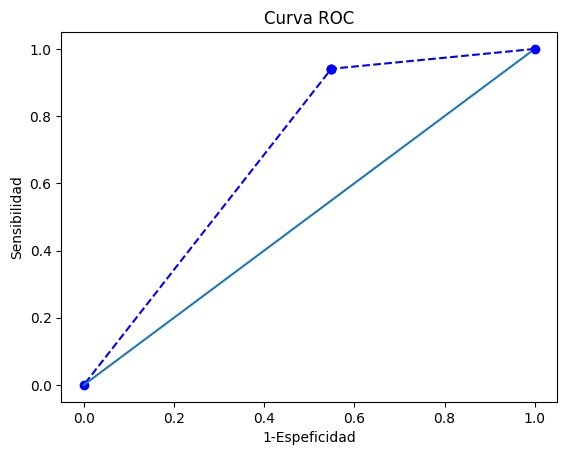

In [52]:
plt.plot(especifities_1,sensitivities,marker="o",
        linestyle="--",color="b")
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-Espeficidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")
plt.show()

> ###  Árbol de decisión.
####  Encontrar el mejor valor de máxima profundidad para el árbol.

In [53]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [54]:
data_cp.head()

,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,1
1,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,1
2,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,1
3,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,1
4,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,1


In [55]:
data_tree = data_cp.copy()

In [56]:
encoder = LabelEncoder()

for var in data.columns.drop("Diagnosis"):
    data_tree[var] = encoder.fit_transform(data_tree[var])

In [57]:
X = data_tree.drop(["Diagnosis"], axis=1)
Y = data_tree["Diagnosis"]

In [58]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [59]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, random_state=0)
    tree.fit(x_train,y_train)
    
    cv = KFold(n_splits=10, shuffle=True, random_state=0)
    score = np.mean(cross_val_score(tree,
                                   X,Y,
                                   scoring="accuracy",
                                   cv=cv))
    print("Score para i = ",i," es de ",score)
    print("Orden de importancia de los atributos:")
    df_importance = pd.DataFrame(list(zip(X.columns,tree.feature_importances_)), columns=["Variable", "Order"]) 
    display(df_importance.sort_values("Order", ascending=False))
    print("\n","-"*60,"\n")

Score para i =  1  es de  0.8273551628265094
Orden de importancia de los atributos:


,Variable,Order
14,Thyroid_Cancer_Risk,1.0
0,Age,0.0
1,Gender,0.0
2,Country,0.0
3,Ethnicity,0.0
4,Family_History,0.0
5,Radiation_Exposure,0.0
6,Iodine_Deficiency,0.0
7,Smoking,0.0
8,Obesity,0.0



 ------------------------------------------------------------ 

Score para i =  2  es de  0.8273551628265094
Orden de importancia de los atributos:


,Variable,Order
14,Thyroid_Cancer_Risk,0.999269
10,TSH_Level,0.000510
13,Nodule_Size,0.000221
0,Age,0.000000
1,Gender,0.000000
2,Country,0.000000
3,Ethnicity,0.000000
4,Family_History,0.000000
5,Radiation_Exposure,0.000000
6,Iodine_Deficiency,0.000000



 ------------------------------------------------------------ 

Score para i =  3  es de  0.8273504611480101
Orden de importancia de los atributos:


,Variable,Order
14,Thyroid_Cancer_Risk,0.997995
10,TSH_Level,0.001176
13,Nodule_Size,0.000511
11,T3_Level,0.000317
0,Age,0.000000
1,Gender,0.000000
2,Country,0.000000
3,Ethnicity,0.000000
4,Family_History,0.000000
5,Radiation_Exposure,0.000000



 ------------------------------------------------------------ 

Score para i =  4  es de  0.8272799377389012
Orden de importancia de los atributos:


,Variable,Order
14,Thyroid_Cancer_Risk,0.995502
10,TSH_Level,0.001796
11,T3_Level,0.000891
13,Nodule_Size,0.000706
2,Country,0.000694
3,Ethnicity,0.000411
0,Age,0.000000
1,Gender,0.000000
4,Family_History,0.000000
5,Radiation_Exposure,0.000000



 ------------------------------------------------------------ 

Score para i =  5  es de  0.8273034456893024
Orden de importancia de los atributos:


,Variable,Order
14,Thyroid_Cancer_Risk,0.991171
13,Nodule_Size,0.002372
10,TSH_Level,0.002326
11,T3_Level,0.001761
12,T4_Level,0.000901
2,Country,0.000691
3,Ethnicity,0.000409
0,Age,0.000368
1,Gender,0.000000
4,Family_History,0.000000



 ------------------------------------------------------------ 

Score para i =  6  es de  0.8271906058474159
Orden de importancia de los atributos:


,Variable,Order
14,Thyroid_Cancer_Risk,0.983516
13,Nodule_Size,0.004299
10,TSH_Level,0.002952
11,T3_Level,0.002946
0,Age,0.002515
12,T4_Level,0.001944
3,Ethnicity,0.000843
2,Country,0.000686
8,Obesity,0.000299
1,Gender,0.000000



 ------------------------------------------------------------ 

Score para i =  7  es de  0.8270213454214439
Orden de importancia de los atributos:


,Variable,Order
14,Thyroid_Cancer_Risk,0.972699
13,Nodule_Size,0.005639
11,T3_Level,0.005479
10,TSH_Level,0.005216
12,T4_Level,0.004643
0,Age,0.003203
2,Country,0.000977
3,Ethnicity,0.000834
1,Gender,0.000513
4,Family_History,0.000339



 ------------------------------------------------------------ 

Score para i =  8  es de  0.826917909599698
Orden de importancia de los atributos:


,Variable,Order
14,Thyroid_Cancer_Risk,0.957879
10,TSH_Level,0.009478
13,Nodule_Size,0.007311
12,T4_Level,0.007072
11,T3_Level,0.006916
0,Age,0.006041
2,Country,0.001767
3,Ethnicity,0.001271
1,Gender,0.000505
4,Family_History,0.000492



 ------------------------------------------------------------ 

Score para i =  9  es de  0.8265605842442311
Orden de importancia de los atributos:


,Variable,Order
14,Thyroid_Cancer_Risk,0.935704
10,TSH_Level,0.015481
12,T4_Level,0.011155
11,T3_Level,0.010665
13,Nodule_Size,0.010007
0,Age,0.009008
2,Country,0.003019
3,Ethnicity,0.001668
7,Smoking,0.000731
4,Family_History,0.000625



 ------------------------------------------------------------ 

Score para i =  10  es de  0.8259728757581126
Orden de importancia de los atributos:


,Variable,Order
14,Thyroid_Cancer_Risk,0.907696
10,TSH_Level,0.019785
12,T4_Level,0.016551
11,T3_Level,0.014403
13,Nodule_Size,0.014402
0,Age,0.013434
2,Country,0.004710
3,Ethnicity,0.003431
1,Gender,0.001084
8,Obesity,0.000962



 ------------------------------------------------------------ 



* ### Para profundidad igual a 2 da el mejor resultado
* ### El atributo que será el nodo raíz es "Thyroid Cancer Risk" ya que es el que mayor importancia tiene.

In [60]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [61]:
tree_clf = DecisionTreeClassifier(criterion="entropy",
                             max_depth=2,
                             random_state=0)
tree_clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [62]:
df_importance = pd.DataFrame(list(zip(x_train.columns,tree_clf.feature_importances_)), columns=["Variable", "Order"]) 
display(df_importance.sort_values("Order", ascending=False))

,Variable,Order
14,Thyroid_Cancer_Risk,0.999269
10,TSH_Level,0.000510
13,Nodule_Size,0.000221
0,Age,0.000000
1,Gender,0.000000
2,Country,0.000000
3,Ethnicity,0.000000
4,Family_History,0.000000
5,Radiation_Exposure,0.000000
6,Iodine_Deficiency,0.000000


In [63]:
preds = tree_clf.predict(x_test)

* ### Evaluar el modelo

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
crosstab_pred = pd.crosstab(y_test,preds, rownames=["Actual"], colnames=["Predictions"])
crosstab_pred

Predictions,0,1
Actual,,
0,6673,8118
1,2898,46119


In [66]:
crosstab_pred.astype("float").div(crosstab_pred.sum(axis=1), axis=0)

Predictions,0,1
Actual,,
0,0.451153,0.548847
1,0.059122,0.940878


In [67]:
accuracy_score(y_test, preds)

0.8273570712136409

> ### Un 45,11% de cancer de tiroides maligna está bien clasificada y un 94% de cancer de tiroides benigna está bien clasificada.

In [68]:
from sklearn.tree import plot_tree

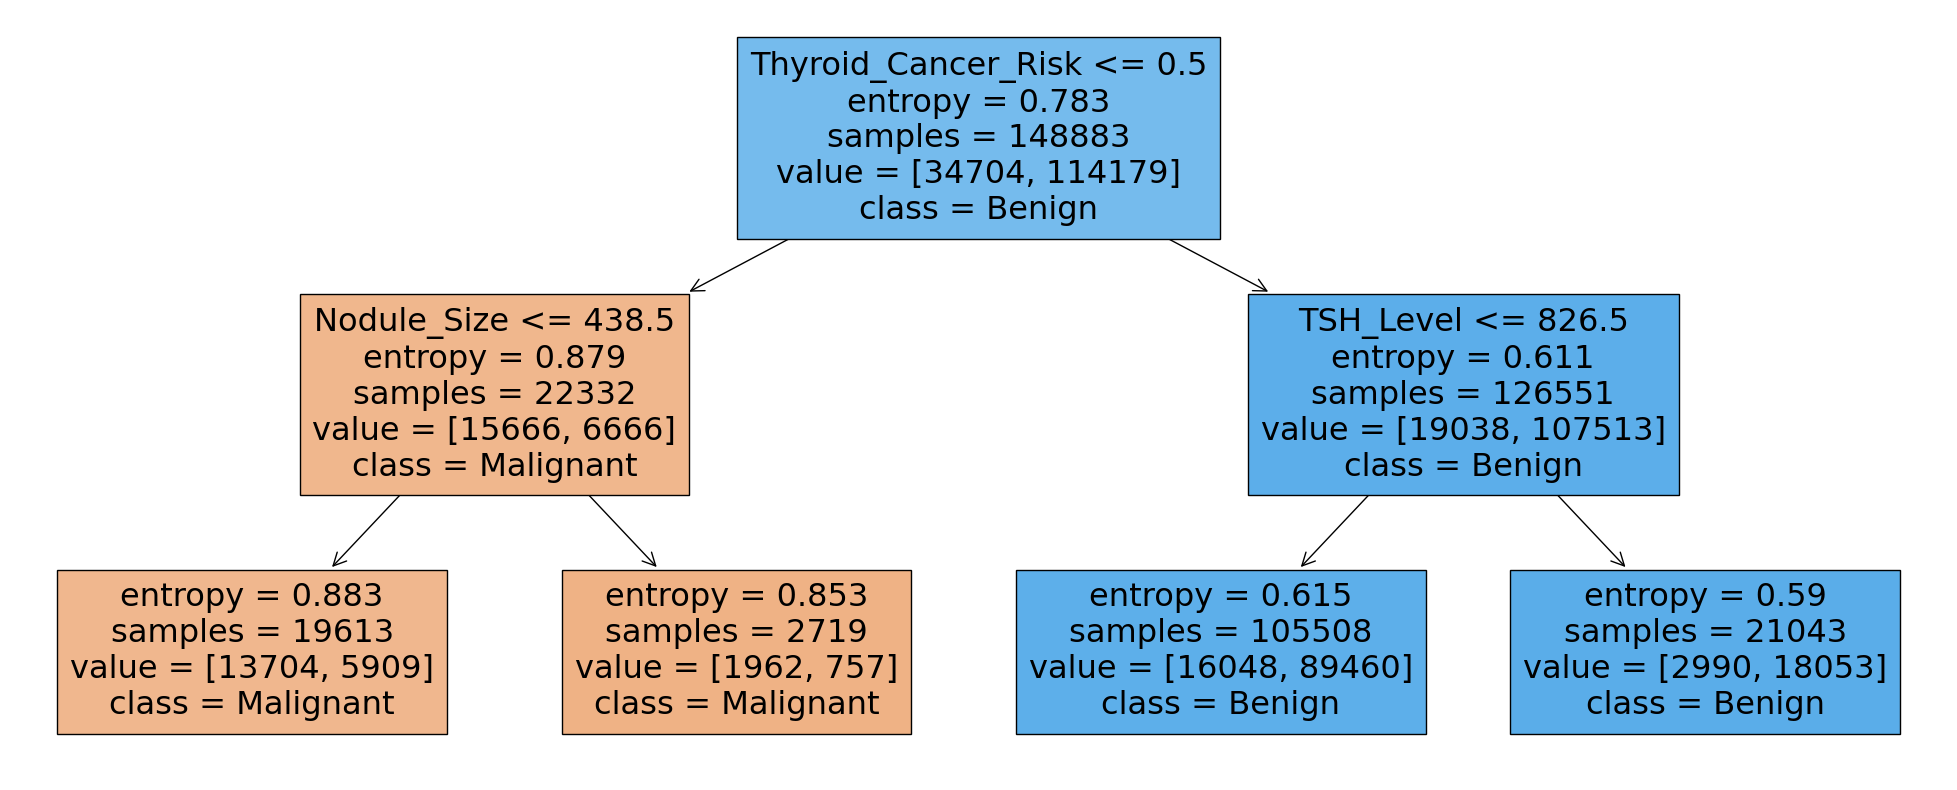

In [70]:
plt.figure(figsize=(25,10))
plot_tree(tree_clf,
          feature_names=x_test.columns,
          filled=True,
         class_names = ["Malignant","Benign"])
plt.show()

## Bosque aleatorio

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
y_train = y_train.replace({"Benign":1, "Malignant":0})

In [73]:
forest = RandomForestClassifier(n_jobs=True, oob_score=True, n_estimators=100, random_state=0)
forest = forest.fit(x_train, y_train)

In [74]:
forest.oob_score_

0.8257087780337581

> ### El bosque aleatorio con un total de 100 árboles nos da un score o una precisión en la predicción de 82,5%